# [1] Data eksplorasi dengan head(), info(), describe(), shape

In [50]:
# inport library
import pandas as pd

# dataset 
dtest = pd.read_csv('https://raw.githubusercontent.com/halimkun/data-science-lanjut/main/datasets/airline_passenger_satisfaction/test.csv')
dtrain = pd.read_csv('https://raw.githubusercontent.com/halimkun/data-science-lanjut/main/datasets/airline_passenger_satisfaction/train.csv')

print('[1] Data eksplorasi dengan head(), info(), describe(), shape')
print('5 dataset teratas')
dtrain.head()

[1] Data eksplorasi dengan head(), info(), describe(), shape
5 dataset teratas


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [51]:
print("Informasi Dataset :")
print(dtrain.info(memory_usage=False))
print("------------------------------")

print("Statistik Deskriptif Dataset :")
dtrain.describe()

Informasi Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location      

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [52]:
print('ukuran dataset :')
print(dtrain.shape)

ukuran dataset :
(103904, 25)


In [53]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(df):
    df = df.drop(['Unnamed: 0', 'id'], axis = 1)
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    
    return df

dtrain = process_data(dtrain)
dtest = process_data(dtest)

print('5 dataset teratas')
dtrain.head()

5 dataset teratas


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


# [2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()

In [32]:
print('[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()')
dtrain.corr()

[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.031732,-0.008928,0.006909,-0.008253,-0.005828,-0.008974,-0.009142,-0.006951,-0.000333,-0.005772,0.042260,0.026502,-0.006117,-0.008156,-0.031798,-0.037391,-0.010563,-0.039410,-0.006505,-0.002935,-0.000347,-0.012211
Customer Type,-0.031732,1.000000,0.281674,-0.308333,0.105735,0.225200,0.007543,0.206869,0.019509,-0.006078,0.059454,0.189262,0.159484,0.109930,0.056560,0.047868,-0.024723,0.032177,-0.022670,0.083613,-0.004036,-0.004815,0.187638
Age,-0.008928,0.281674,1.000000,0.048524,0.140565,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105,0.137167
Type of Travel,0.006909,-0.308333,0.048524,1.000000,0.545257,0.267344,0.105085,-0.259763,0.133511,0.030700,0.063439,0.224803,0.124399,0.148199,0.056543,0.138803,0.031321,-0.016751,0.022599,0.079207,0.005432,0.005867,0.449000
Class,-0.008253,0.105735,0.140565,0.545257,1.000000,0.451211,0.036279,-0.092788,0.106391,0.004150,0.085908,0.322924,0.227444,0.194366,0.209505,0.204964,0.160460,0.151613,0.156353,0.135818,-0.009637,-0.013538,0.494471
Flight Distance,-0.005828,0.225200,0.099461,0.267344,0.451211,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002470,0.298780
Inflight wifi service,-0.008974,0.007543,0.017859,0.105085,0.036279,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019042,0.284245
Departure/Arrival time convenient,-0.009142,0.206869,0.038125,-0.259763,-0.092788,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918,-0.051601
Ease of Online booking,-0.006951,0.019509,0.024842,0.133511,0.106391,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007947,0.171705
Gate location,-0.000333,-0.006078,-0.001330,0.030700,0.004150,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005178,0.000682


# [3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()

In [34]:
print('[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()')
dtrain.groupby(dtrain['satisfaction']).size()

[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()


satisfaction
0    58879
1    45025
dtype: int64

# [4] Data eksplorasi dengan visualisasi

Menggambarkan hubungan setiap feature


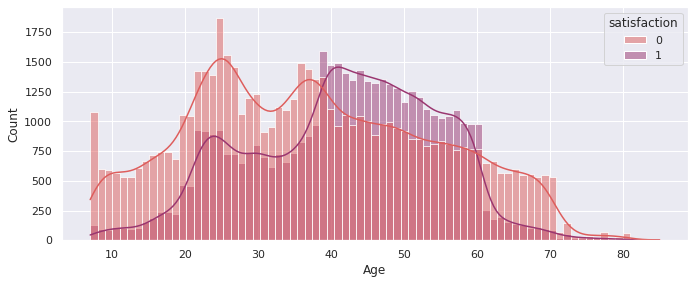

<Figure size 720x288 with 0 Axes>

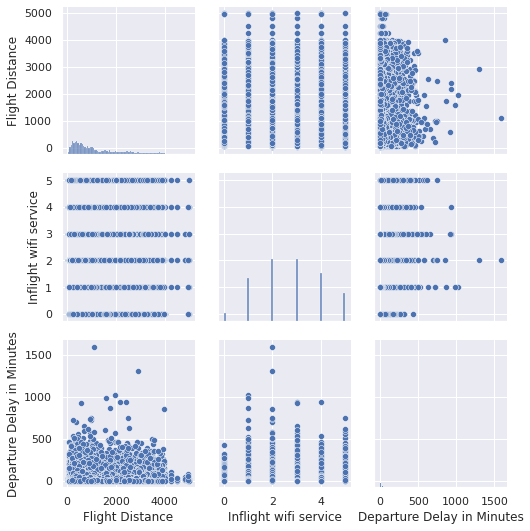

In [65]:
# Library
import matplotlib.pyplot as plt
import seaborn as sns

# SETTING: matplotlib dan seaborn
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

column_to_show = ['Flight Distance', 'Inflight wifi service','Departure Delay in Minutes']

# 4. data eksplorasi dengan visualisasi
# 4a. Visualisasi umur yang dibandingkan dengan kepuasan pelanggan menggunakan seaborn
sns.set(rc = {'figure.figsize':(10,4)})
sns.histplot(x='Age',hue="satisfaction",data=dtrain,kde=True,palette="flare")

# 4b. Gunakan pairplot() dari seaborn (sns) modul untuk menggambarkan hubungan setiap feature.
print("Menggambarkan hubungan setiap feature")
plt.figure()
sns.pairplot(dtrain[column_to_show])
plt.show()

In [44]:
print("[5] Cek missing value")
dtrain.isnull().sum().sum()

[5] Cek missing value


0

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

print("[6] Melakukan pemodelan dengan Logistic Regression, menggunakan perbandingan 80:20 untuk training vs testing")

features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 
            'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
            'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
            'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 
            'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

X = dtrain[features]
y = dtrain['satisfaction']

# melakukan normalisasi data
# scaler = preprocessing.StandardScaler()
# X_scalled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

logReg = LogisticRegression(max_iter=1000000)
logReg = logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

print("Evaluasi Model Performance:")
print("Training Accuracy :", logReg.score(X_train, y_train))
print("Testing Accuracy :", logReg.score(X_test, y_test))

[6] Melakukan pemodelan dengan Logistic Regression, menggunakan perbandingan 80:20 untuk training vs testing
Evaluasi Model Performance:
Training Accuracy : 0.8741623858619155
Testing Accuracy : 0.8767624272171696


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

print("[7] Print Confusion matrix dan classification report")
print("Confusion matrix : ")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Classification report : ")
cr = classification_report(y_test, y_pred)
print(cr)

[7] Print Confusion matrix dan classification report
Confusion matrix : 
[[10607  1106]
 [ 1453  7615]]
Classification report : 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.87      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781

